## EDA DATA GRAB Food

In [3]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode(connected = True)


In [4]:
df= pd.read_csv('grab.csv', encoding="ISO-8859-1")

In [5]:
df

,Unnamed: 0,nama_resto,kategori_resto,rating_resto,menu_resto,harga
0,1,McDonald's - Cideng,"Chicken,Fast Food",4.7,2xPaNas1 Ayam Lengkuas (Krispy) + 2x McFlurry ...,95000.0
1,2,McDonald's - Cideng,"Chicken,Fast Food",4.7,2xPaNas1 Ayam Lengkuas (Spicy) + 2x McFlurry OREO,95000.0
2,3,McDonald's - Cideng,"Chicken,Fast Food",4.7,PaMer 5 Ayam Lengkuas ALC (Krispy) + 3x Iced C...,150000.0
3,4,McDonald's - Cideng,"Chicken,Fast Food",4.7,PaMer 5 Ayam Lengkuas ALC (Spicy) + 3x Iced Co...,150000.0
4,5,McDonald's - Cideng,"Chicken,Fast Food",4.7,PaMer 5 Ayam Lengkuas ALC (Mix) + 3x Iced Coffee,150000.0
...,...,...,...,...,...,...
5844,5845,Kantin Bunda Masakan Padang - Pasar Baru,"Padang,Breakfast",1.0,Nasi Telor Bulat,19000.0
5845,5846,Kantin Bunda Masakan Padang - Pasar Baru,"Padang,Breakfast",1.0,Nasi Perkedel,12000.0
5846,5847,Kantin Bunda Masakan Padang - Pasar Baru,"Padang,Breakfast",1.0,Nasi Lele Goreng,25000.0
5847,5848,Kantin Bunda Masakan Padang - Pasar Baru,"Padang,Breakfast",1.0,Nasi Kembung goreng,29000.0


In [6]:
df.drop(['Unnamed: 0'], axis=1, inplace= True)

In [7]:
def unique_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    uniques = []
    for col in data.columns:
        unique = data[col].nunique()
        uniques.append(unique)
    tt['Uniques'] = uniques
    return tt

In [8]:
unique_values(df)

,Total,Uniques
nama_resto,5849,96
kategori_resto,5849,55
rating_resto,5849,13
menu_resto,5849,4542
harga,5849,620


Banyak duplikasi data dari nama resto. kita akan drop data duplikat.

In [9]:
df['nama_resto'].unique()

array(["McDonald's - Cideng",
       'Lontong Sayur Medan Kak Ika - Petojo Selatan',
       'Bubur Ayam H. Hadi - Kebon Sirih',
       'Bubur Ayam Cideng 48 - Petojo Selatan',
       'Kopi Kenangan x Cerita Roti x Kenangan Manis - Ruko Cideng',
       'Starbucks - Tomang', 'HokBen - Tomang', 'Fore Coffee - Cideng',
       'Laota Ge Express - Gambir', 'Mie Ayam Sumiyati - Gambir',
       'Kopi Kenangan x Cerita Roti - JB Tower', "McDonald's - Gambir",
       'Kopi Oey - Sabang', 'Solaria - Stasiun Gambir',
       'Janji Jiwa & Jiwa Toast - JXTaste', 'HokBen - Stasiun Gambir',
       'Krispy Kreme - Gambir', 'Starbucks - Sabang',
       'Wr Rujak Buah Fitria Parto - Gambir', 'Bakmi GM - Stasiun Gambir',
       'Lawson - Jb Tower', 'Sabang 16 - Kebon Sirih',
       'Gadogado Ketoprak Kemkominfo - Gambir', 'KFC - Stasiun Gambir',
       'CFC - Stasiun Gambir A', 'Thai Alley - Kebon Sirih',
       'Rujak Buah Potong Goyang Lidah - Gambir',
       'Cafe Kembar - Petojo Selatan', 'Ayam Kwali 

In [10]:
df['kategori_resto'].unique()

array(['Chicken,Fast Food', 'Rice', 'Breakfast', 'Coffee,Snack,Breakfast',
       'Coffee,Beverages,Bakery & Cake,Breakfast',
       'Japanese,Rice,Fast Food', 'Coffee,Breakfast', 'Fast Food',
       'Aneka Nasi,Ayam,Minuman ', 'Coffee,Chicken,Snack,Fast Food',
       'Rice,Beverages,Bakery & Cake', 'Chinese,Chicken,Noodles,Rice',
       'Bakery & Cake', 'Dessert', 'Noodles,Rice', 'Convenience Store',
       'Noodles,Dessert,Beverages', 'Indonesian',
       'Fast Food,Fried Chicken,Western', 'Rice,Fast Food,Chicken',
       'International', 'Snack', 'Rice,Chicken,Seafood', 'Seafood',
       'Cemilan,Masakan Indonesia,Minuman ', 'Beverages',
       'Pencuci Mulut,Minuman ,Ayam', 'Bakso & Soto',
       'Satay,Breakfast,Bakso & Soto', 'Beverages,Dessert',
       'Rice,Fast Food', 'Beverages,Coffee', 'Noodles,Rice,Chicken',
       'Breakfast,Bakso & Soto', 'Beef', 'Bakso & Soto,Breakfast',
       'Bakso & Soto,Rice', 'Rice,Snack,Beverages', 'Chicken,Breakfast',
       'Rice,Breakfast,Bakso

In [12]:
resto = df.drop_duplicates(subset='nama_resto', keep = 'first')

In [13]:
resto.head()

,nama_resto,kategori_resto,rating_resto,menu_resto,harga
0,McDonald's - Cideng,"Chicken,Fast Food",4.7,2xPaNas1 Ayam Lengkuas (Krispy) + 2x McFlurry ...,95000.0
123,Lontong Sayur Medan Kak Ika - Petojo Selatan,Rice,4.7,Ongol Ongol 1 Pcs,15000.0
160,Bubur Ayam H. Hadi - Kebon Sirih,Breakfast,4.7,Bubur Ayam Karage,35000.0
175,Bubur Ayam Cideng 48 - Petojo Selatan,Breakfast,4.7,tambah krupuk,2000.0
183,Kopi Kenangan x Cerita Roti x Kenangan Manis -...,"Coffee,Snack,Breakfast",4.9,Hari Raya bareng Mantan,129000.0


In [14]:
resto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96 entries, 0 to 5805
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   nama_resto      96 non-null     object 
 1   kategori_resto  96 non-null     object 
 2   rating_resto    96 non-null     float64
 3   menu_resto      96 non-null     object 
 4   harga           96 non-null     float64
dtypes: float64(2), object(3)
memory usage: 4.5+ KB


In [16]:
resto.describe()

,rating_resto,harga
count,96.000000,96.000000
mean,3.669792,35641.864583
std,1.935384,38434.809251
min,0.000000,1.000000
25%,3.950000,14250.000000
50%,4.700000,25000.000000
75%,4.800000,39001.000000
max,5.000000,247500.000000


### feat kategori resto
setiap restoran mempunyai lebih dari satu kategori.
untuk mengelompokan, saya ambil kategori yang pertama. merupakan kategori utama dari masing-masing restoran

In [17]:
new= resto['kategori_resto'].str.split(',', expand=True)

In [18]:
resto['jenis'] = new[0]

In [19]:
resto['jenis'].unique()

array(['Chicken', 'Rice', 'Breakfast', 'Coffee', 'Japanese', 'Fast Food',
       'Aneka Nasi', 'Chinese', 'Bakery & Cake', 'Dessert', 'Noodles',
       'Convenience Store', 'Indonesian', 'International', 'Snack',
       'Seafood', 'Cemilan', 'Beverages', 'Pencuci Mulut', 'Bakso & Soto',
       'Satay', 'Beef', 'Padang', 'Specialty Store'], dtype=object)

In [36]:
j_count= resto['jenis'].value_counts().reset_index()

In [37]:
#Kategori resto setelah di split terdapat 23 jenis
j_count

,index,jenis
0,Rice,24
1,Coffee,11
2,Satay,7
3,Beverages,7
4,Chicken,6
5,Bakso & Soto,6
6,Indonesian,5
7,Breakfast,5
8,Noodles,3
9,Snack,2


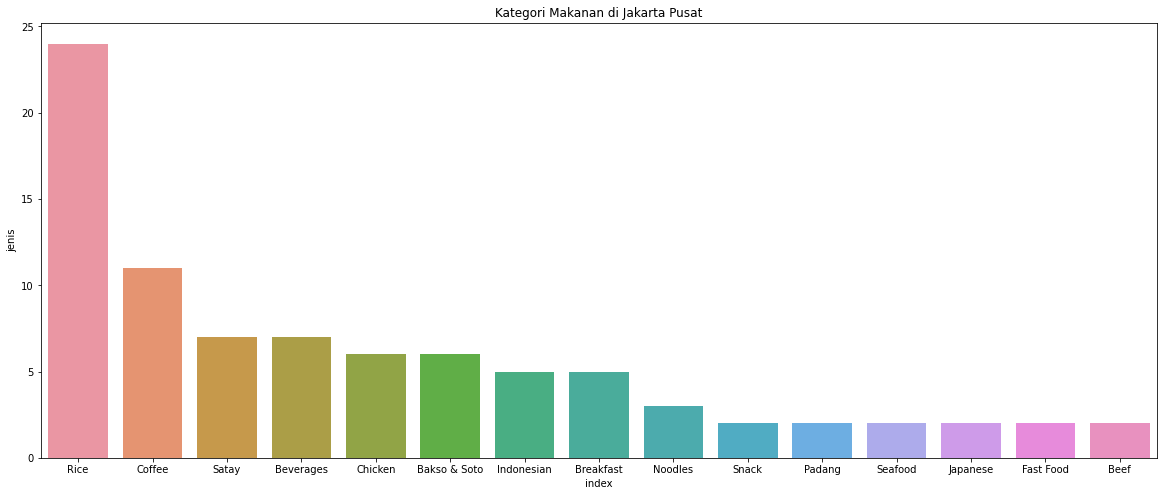

In [43]:
plt.figure(figsize=(20,8))
ax=sns.barplot(x= "index", y="jenis", data=j_count[0:15])
ax.set_title('Kategori Makanan di Jakarta Pusat')
plt.show()

Kategori terbanyak adalah nasi

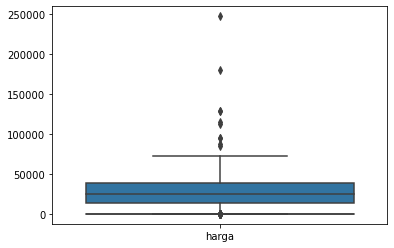

In [65]:
sns.boxplot(data=resto[['rating_resto']], orient='v');
sns.boxplot(data=resto[['harga']], orient='v');

C:\Users\Performance Mngmt\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\Performance Mngmt\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



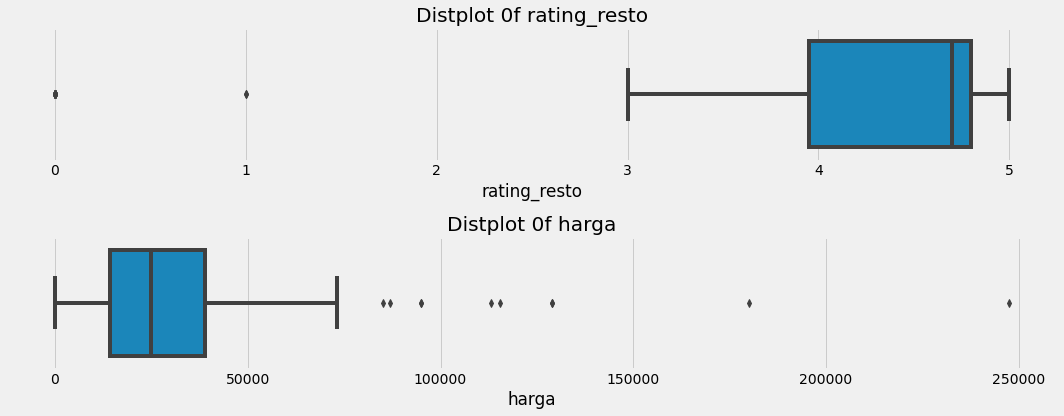

In [67]:
plt.style.use("fivethirtyeight")

plt.figure(1, figsize=(15,6))
n = 0
for x in ['rating_resto', 'harga']:
    n += 1
    plt.subplot(2, 1, n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.boxplot(resto[x])
    plt.title('Distplot 0f {}'.format(x))
plt.tight_layout()
plt.show()


### Mengetahui rata-rata harga berdasarkan kategori

In [85]:
harga = pd.DataFrame({'harga' : df.groupby('nama_resto')['harga'].max()})

In [86]:
harga.sort_values(by='harga', ascending=False)

,harga
nama_resto,
Penang Bistro - Kebon Sirih,561000.0
Thai Alley - Kebon Sirih,502000.0
Rajanya Jus Buah Bu Aisyah 46 - Kebon Sirih,500000.0
Pesan Sekaligus! - Jl. Kebon Sirih Barat,500000.0
Starbucks - Sabang,405000.0
...,...
Bakso Malang Tenda Biru - Gambir,19000.0
Nasi Goreng Gila Tenda Biru - Gambir,18750.0
Bakso Kemulyaan - Gambir,18000.0


In [47]:
n_harga = df['kategori_resto'].str.split(',', expand=True)

In [51]:
df['jenis'] = n_harga[0]

In [76]:
df.tail()

,nama_resto,kategori_resto,rating_resto,menu_resto,harga,jenis
5844,Kantin Bunda Masakan Padang - Pasar Baru,"Padang,Breakfast",1.0,Nasi Telor Bulat,19000.0,Padang
5845,Kantin Bunda Masakan Padang - Pasar Baru,"Padang,Breakfast",1.0,Nasi Perkedel,12000.0,Padang
5846,Kantin Bunda Masakan Padang - Pasar Baru,"Padang,Breakfast",1.0,Nasi Lele Goreng,25000.0,Padang
5847,Kantin Bunda Masakan Padang - Pasar Baru,"Padang,Breakfast",1.0,Nasi Kembung goreng,29000.0,Padang
5848,Kantin Bunda Masakan Padang - Pasar Baru,"Padang,Breakfast",1.0,Nasi Mujair Goreng,25000.0,Padang


In [59]:
harga_median = df.groupby('jenis').agg({"harga" : "median"}).reset_index().sort_values(by='harga', ascending=False)
harga_median

,jenis,harga
1,Bakery & Cake,108000.0
14,International,83800.0
23,Specialty Store,54100.0
8,Chinese,41000.0
21,Seafood,36000.0
3,Beef,36000.0
15,Japanese,35001.0
16,Noodles,34850.0
9,Coffee,32000.0
19,Rice,30899.0


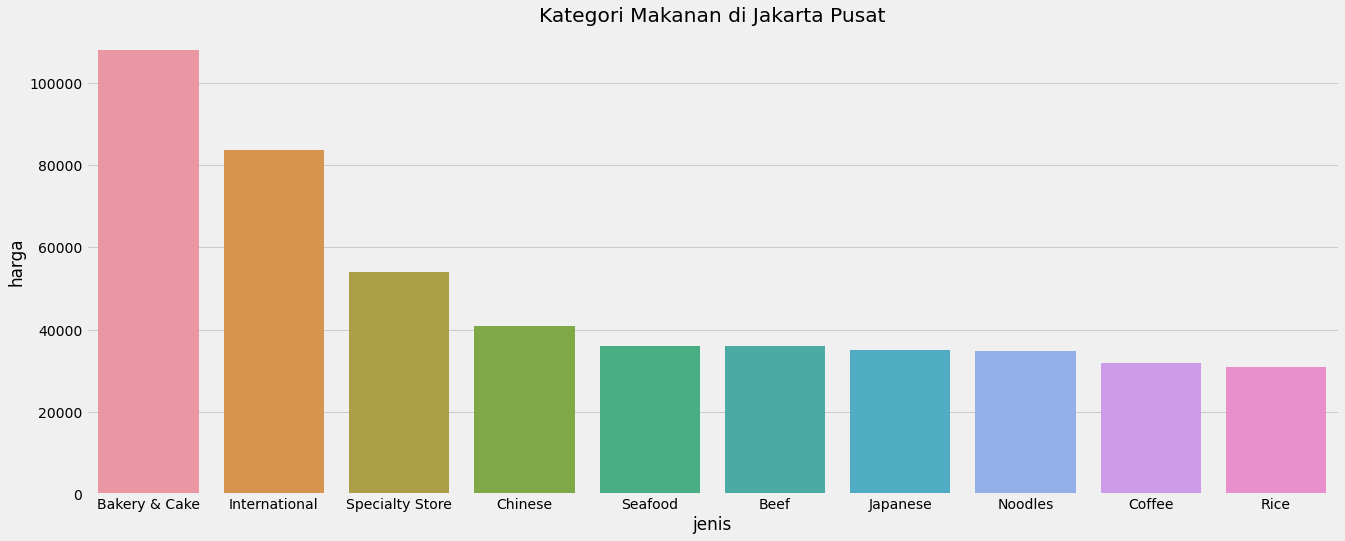

In [89]:
plt.figure(figsize=(20,8))
ax=sns.barplot(x="jenis", y="harga", data=harga_median[0:10])
ax.set_title('Kategori Makanan di Jakarta Pusat')
plt.show()

In [79]:
rat = resto.groupby('jenis').agg({"rating_resto" : "mean"}).reset_index().sort_values(by='rating_resto', ascending=False)
rat

,jenis,rating_resto
16,Noodles,4.866667
21,Seafood,4.800000
3,Beef,4.800000
15,Japanese,4.800000
1,Bakery & Cake,4.800000
8,Chinese,4.800000
10,Convenience Store,4.800000
14,International,4.700000
9,Coffee,4.654545
0,Aneka Nasi,4.600000


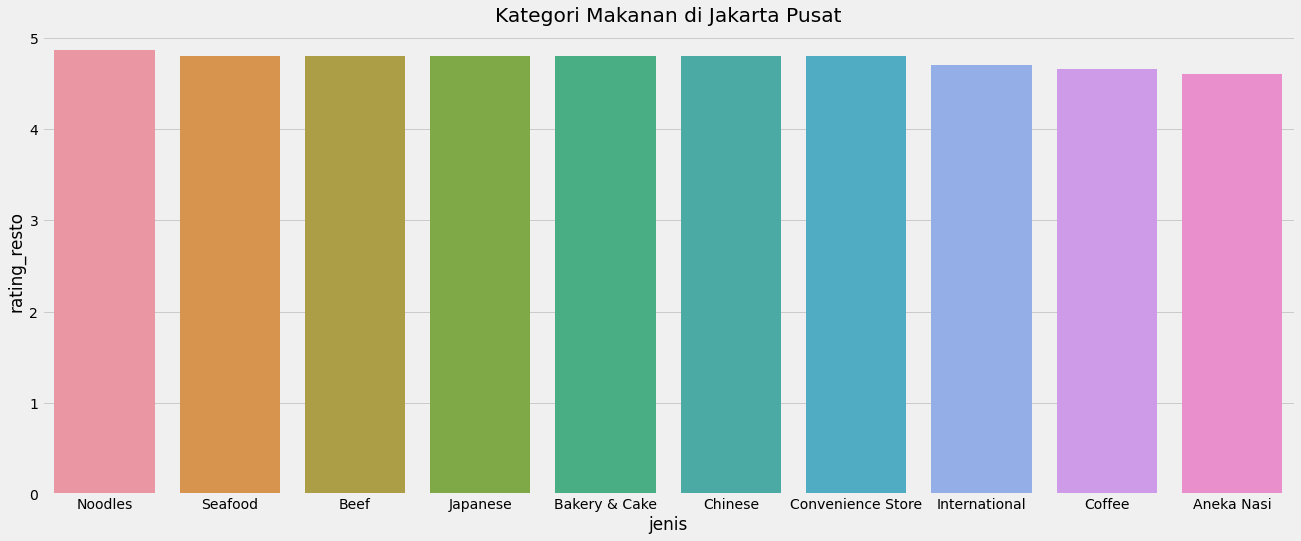

In [90]:
plt.figure(figsize=(20,8))
ax=sns.barplot(x="jenis", y="rating_resto", data=rat[0:10])
ax.set_title('Kategori Makanan di Jakarta Pusat')
plt.show()

In [91]:
rating_harga = rat.join(harga_median.set_index('jenis'), on='jenis')
rating_harga

,jenis,rating_resto,harga
16,Noodles,4.866667,34850.0
21,Seafood,4.800000,36000.0
3,Beef,4.800000,36000.0
15,Japanese,4.800000,35001.0
1,Bakery & Cake,4.800000,108000.0
8,Chinese,4.800000,41000.0
10,Convenience Store,4.800000,10000.0
14,International,4.700000,83800.0
9,Coffee,4.654545,32000.0
0,Aneka Nasi,4.600000,24500.0


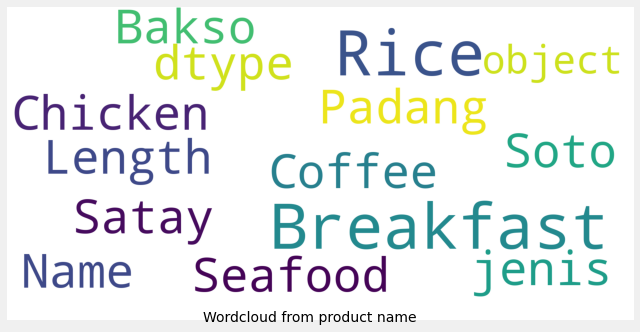

In [81]:
stopwords = set(STOPWORDS)
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=5,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(10,10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=14)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(resto["jenis"], "Wordcloud from product name")

In [115]:
rat

,jenis,rating_resto
16,Noodles,4.866667
21,Seafood,4.800000
3,Beef,4.800000
15,Japanese,4.800000
1,Bakery & Cake,4.800000
8,Chinese,4.800000
10,Convenience Store,4.800000
14,International,4.700000
9,Coffee,4.654545
0,Aneka Nasi,4.600000


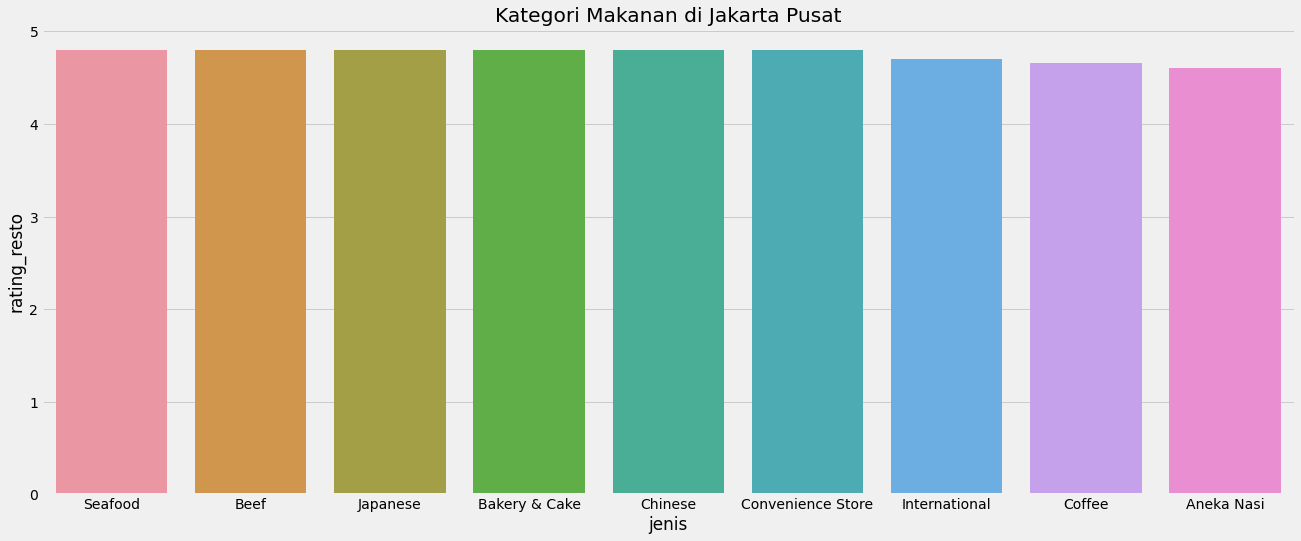

In [77]:
plt.figure(figsize=(20,8))
ax=sns.barplot(x="jenis", y="rating_resto", data=rat[1:10])
ax.set_title('Kategori Makanan di Jakarta Pusat')
plt.show()

In [129]:
resto['jenis'].value_counts().reset_index()

,index,jenis
0,Rice,24
1,Coffee,11
2,Satay,7
3,Beverages,7
4,Chicken,6
5,Bakso & Soto,6
6,Indonesian,5
7,Breakfast,5
8,Noodles,3
9,Seafood,2
